### BOW(Bag Of Words)

In [29]:
# Bag of Words(BoW) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고
# 각 인덱스의 위치에 단어의 출현 횟수를 저장

from konlpy.tag import Okt
import re  

okt=Okt()  

token=re.sub("[.!#~]","", '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

#형태소 분석
token=okt.morphs(token)  

word2index={}  #단어 사전(단어와 숫자 인덱스)
bow=[]  #단어 가방(단어와 출현 횟수)

for voca in token:  
    #사전에 없는 단어 추가
    if voca not in word2index.keys():  
        word2index[voca]=len(word2index)  
 
        #단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        #재등장하는 단어의 인덱스
        index=word2index.get(voca)

        #단어 카운트 증가
        bow[index]=bow[index]+1         

print(word2index)  # 단어사전(정수인코딩)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [30]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스

corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가 비가']

vector = CountVectorizer()
vector.fit(corpus)

print(vector.vocabulary_)
print(vector.transform(line).toarray()) #단어가 출현한 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 2 0 1]]


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산
#단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())  

# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [33]:
f=open('c:/workspace3/data/news1.txt', encoding='utf8')
corpus=f.read()
txt=okt.nouns(corpus)

txt2=[' '.join(txt)]
txt2

['세종 연합뉴스 이준서 기자 정부 결혼 자금 대해 증여세 공제 한도 현행 자녀 장려 금 소득 기준 현행 대폭 상향 조정 중산층 가구 지원 범위 확대 의미 콘텐츠 경쟁력 위해 영상 콘텐츠 제작비 대한 세액 율도 폭 바이오 의약품 산업 국가 전략 기술 지정 시설 투자 연구 개발 지출 를 각각 세금 기획재정부 내용 세법개정안 발표 소득 세법 법인 세법 상속 증여 세법 특례 법 등 개 개정안 내년 예산안 국회 제출 주요 정책 목표 활 제 수출 투자 수 진작 민생 경제 회복 서민 중산층 및 소상 공인 중소기업 부담 완화 미래 대비 인구 지역 위기 극복 등 꼽았다 추경호 부총리 겸 기획재정부 장관 브리핑 우리 기업 국제 무대 경쟁 핵심 역량 과감 지원 며 민생 경제 조속 회복 서민 중산층 지원 인구 감소 지역 소멸 위기 등 미래 대비 위 구조 문제 적극 대응 고 활 뒷받침 조치 영상 콘텐츠 투자 지원 내 프로그램 영화 드라마 등 콘텐츠 제작비 대해 최대 세액 율 적용 기본 율 대기업 중견 기업 중소기업 로 상향 조정 국내 파급 효과 콘텐츠 대해 선 를 추가 제한 바이오 의약품 국가 전략 기술 추가 바이오 의약품 지출 중소기업 중견 대기업 의 세액 율 적용 바이오 의약품 설비 시설 투자 중소기업 중견 대기업 의 세액 공제 첨단 전략 산업 생산 시설 국내 복귀 리쇼 링 를 유도 위해 최대 소득세 및 법인세 를 현행 혜택 로 것 리쇼 링 지원 업종 요건 적용 가업승계 세제 지원 조치 달 초 하반기 경제정책 방향 예고 내용 그대로 반영 증여세 특례 율 과세 적용 재산 가액 한도 증여세 부연 납 분할 납부 기간 현행 연장 내용 업종 변경 제한 완화 주택 담보 대출 이자 환액 소득공제 확대 현재 취득 당시 기준 시가 이하 주택 대해 상환 기간 방식 소득공제 기준 시가 높이 한도 상향 조정 주택 청약 종합 저축 가입 때 소득공제 대상 납입 한도 연간 고액 기부 활성화 위해 초과 부금 대해 한시 세액 율 로 올린다 반려동물 진료 비 대한 부가가치세 면제 확대 맥주 탁주 등 주류 종량

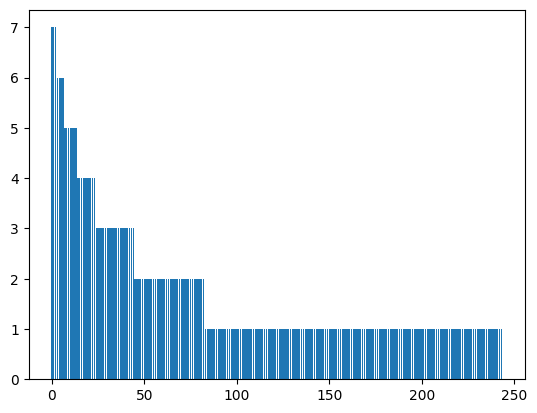

[('대해', 7), ('지원', 7), ('조정', 7), ('공제', 6), ('현행', 6), ('적용', 6), ('기준', 6), ('상향', 5), ('세액', 5), ('소득', 5), ('가구', 5), ('증여세', 5), ('콘텐츠', 5), ('한도', 5), ('증여', 4), ('최대', 4), ('의약품', 4), ('연간', 4), ('투자', 4), ('바이오', 4), ('확대', 4), ('중소기업', 4), ('주택', 4), ('세율', 4), ('대비', 3), ('전략', 3), ('내용', 3), ('시설', 3), ('높이', 3), ('대기업', 3), ('지급', 3), ('자금', 3), ('자녀', 3), ('소득공제', 3), ('추가', 3), ('중견', 3), ('중산층', 3), ('세법', 3), ('세금', 3), ('고려', 3), ('조치', 3), ('결혼', 3), ('설명', 3), ('위해', 3), ('과세', 3), ('산업', 2), ('리쇼', 2), ('혼인신고', 2), ('국내', 2), ('경제', 2), ('국가', 2), ('완화', 2), ('장려', 2), ('회복', 2), ('재산', 2), ('로부터', 2), ('지출', 2), ('부모', 2), ('미래', 2), ('제작비', 2), ('지역', 2), ('민생', 2), ('영상', 2), ('서민', 2), ('국회', 2), ('부총리', 2), ('정부', 2), ('위기', 2), ('기본', 2), ('기간', 2), ('시가', 2), ('업종', 2), ('현재', 2), ('기업', 2), ('제한', 2), ('특례', 2), ('인구', 2), ('탄력', 2), ('대폭', 2), ('대한', 2), ('기획재정부', 2), ('상황', 2), ('기술', 2), ('전후', 1), ('적극', 1), ('전국', 1), ('결혼식', 1), ('과거', 1), ('재량', 1), (

In [34]:
import numpy as np
import matplotlib.pyplot as plt

vect = CountVectorizer().fit(txt2)

#bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)

idx = np.argsort(-cnt) #카운트 내림차순 정렬
cnt = cnt[idx]

# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]

plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [35]:
#불용어 추가

vector = CountVectorizer(stop_words=['기자'])
#                           불용어 리스트

print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[5 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 3 1 1 6 1 1 3 1 1 1 2 2 1 2 1 1 1
  2 2 1 2 2 1 6 2 1 1 1 1 3 1 3 1 1 3 3 1 1 1 1 2 2 7 1 1 1 2 2 1 1 1 1 1
  1 1 1 1 1 1 2 1 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2
  1 5 1 2 1 2 3 1 3 3 1 5 4 1 1 1 5 3 1 1 1 1 1 1 1 2 3 1 1 1 1 1 2 1 4 1
  1 1 1 1 2 1 1 1 1 2 1 1 2 3 1 1 1 4 1 1 1 2 1 3 1 3 1 1 2 1 2 1 1 6 1 3
  1 2 1 1 2 1 2 1 7 3 1 1 1 1 4 3 3 4 4 5 3 1 2 7 1 2 1 1 1 1 1 1 4 3 1 1
  1 5 1 2 4 2 1 1 1 1 1 1 1 5 1 1 1 1 2 6 1 2 4 1 1 2 1]]
{'세종': 122, '연합뉴스': 147, '이준서': 163, '정부': 181, '결혼': 12, '자금': 167, '대해': 61, '증여세': 199, '공제': 22, '한도': 229, '현행': 235, '자녀': 169, '장려': 172, '소득': 124, '기준': 42, '대폭': 59, '상향': 109, '조정': 188, '중산층': 196, '가구': 0, '지원': 203, '범위': 88, '확대': 238, '의미': 160, '콘텐츠': 217, '경쟁력': 15, '위해': 157, '영상': 148, '제작비': 184, '대한': 60, '세액': 119, '율도': 159, '바이오': 82, '의약품': 161, '산업': 107, '국가': 29, '전략': 179, '기술': 39, '지정': 204, '시설': 134, '투자': 220, '연구': 143, '개발': 10, '지출': 205, '각각': 6, '세금': 11